# Amazon Data Science Problem

Problem:

1. Determine if a User should get a credit card (yes or no).
2. Determine which products to advertise to the User.

Dataset:

- 3-4 columns
    - Customer Information: age, sex
    - Purchases: list for transaction type data
    - Label: credit card boolean
- 25-30 rows

## Import Libraries

In [46]:
# general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import csv

In [14]:
# sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [41]:
# arm libraries
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori as ml_apriori
from mlxtend.frequent_patterns import association_rules as ml_association

## Create Data

In [5]:
np.random.seed(42)
age = np.random.randint(25, 56, size=30)
sex = np.random.randint(0, 2, size=30)
credit_card = np.random.randint(0, 2, size=30)

In [8]:
possible_purchases = ['bodywash', 'shampoo', 'cards', 'pens', 'paper', 'bags', 'supplements', 'electronics', 'drinks']
items_purchased = []

for user in range(30):
    number_purchases = random.randint(1, len(possible_purchases))
    user_purchases = random.sample(possible_purchases, number_purchases)
    items_purchased.append(user_purchases)

In [10]:
data = pd.DataFrame({'age': age, 'sex': sex, 'purchases': items_purchased, 'credit_card': credit_card})


In [17]:
data['credit_card'] = data['credit_card'].apply(lambda result: 'yes' if result == 1 else 'no')

In [18]:
data

,age,sex,purchases,credit_card
0,31,0,"[shampoo, electronics, bags, bodywash, paper, ...",no
1,44,1,[supplements],no
2,53,1,"[pens, paper, electronics]",no
3,39,1,"[cards, bodywash, paper, electronics, bags, su...",no
4,35,0,"[pens, drinks, bags, paper, bodywash, shampoo,...",yes
5,32,1,"[shampoo, paper, supplements, bodywash, bags, ...",yes
6,53,0,[shampoo],no
7,45,0,"[paper, shampoo, pens]",yes
8,31,0,[electronics],yes
9,50,0,"[supplements, bodywash, bags, paper, cards]",yes


In [19]:
data.to_csv('amazon_dataset.csv')

## Problem 1 - Credit Card

In [20]:
# separate data
X = data[['age', 'sex']]
y = data['credit_card']

In [21]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# look at results
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

In [24]:
print(accuracy)

0.4444444444444444


<Figure size 1600x1200 with 0 Axes>

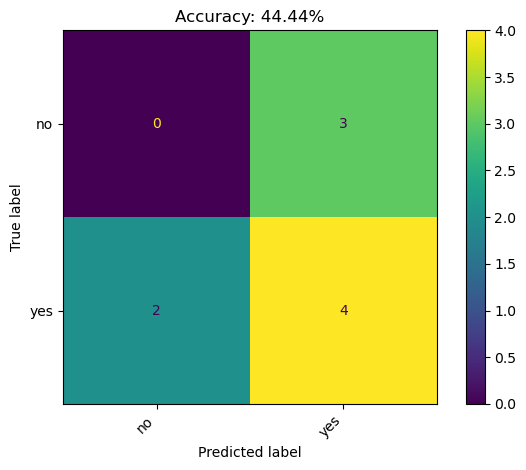

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plt.figure(figsize=(16, 12))
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.title(f'Accuracy: {accuracy:.2%}')
plt.tight_layout()
plt.show()

## Problem 2 - Products to Advertise

In [47]:
# prepare data to use in the R environment
transactions = data['purchases'].tolist()

In [49]:
with open('transactions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(transactions)

In [50]:
# import results created in R notebook
advertise_rules = pd.read_csv('advertise_products.csv')

In [51]:
advertise_rules

,rules,support,confidence,coverage,lift,count
0,{pens} => {drinks},0.200000,0.666667,0.300000,1.666667,6
1,{drinks} => {pens},0.200000,0.500000,0.400000,1.666667,6
2,{pens} => {electronics},0.200000,0.666667,0.300000,1.428571,6
3,{pens} => {paper},0.200000,0.666667,0.300000,1.333333,6
4,{cards} => {bags},0.233333,0.777778,0.300000,1.794872,7
...,...,...,...,...,...,...
72,"{bags,drinks,electronics} => {shampoo}",0.200000,0.750000,0.266667,1.875000,6
73,"{bags,drinks,electronics} => {paper}",0.200000,0.750000,0.266667,1.500000,6
74,"{bags,drinks,paper} => {electronics}",0.200000,1.000000,0.200000,2.142857,6
75,"{drinks,electronics,paper} => {bags}",0.200000,1.000000,0.200000,2.307692,6


In [62]:
# proportion of item purchases
transaction_counts = {}
for transaction in transactions:
    for item in transaction:
        if item in transaction_counts:
            transaction_counts[item] += 1
        else:
            transaction_counts[item] = 1

In [68]:
transaction_counts_df = pd.DataFrame(list(transaction_counts.items()), columns=['Item', 'Count'])

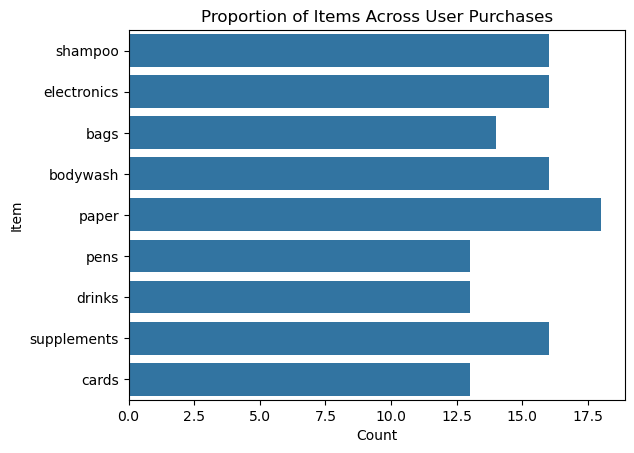

In [72]:
sns.barplot(transaction_counts_df, y='Item', x='Count')
plt.title('Proportion of Items Across User Purchases')
plt.show()

## Results - Credit Card

### Technical Results

Logistic Regression with default parameters was used to create a model which to try and predict whether a credit card should be given to a user. The model did not perform great, with an accuracy of 44.44%. Predictions for turning down a recipient were all False Positives while there was better perfomance on predictions for accepting a recipient, however still showed a close amount of False Negatives. The number of testing datapoints available for "yes" and "no" was highly disproportionate. The imbalance is slightly prevelant within the dataset itself, however with how small the dataset is currently, rebalancing isn't exactly an option. Most likely, just using age and sex of a user to predict whether they should receive a credit card or not just aren't great indicators for this model. Additionally, more datapoints, i.e., more users would be necessary to create a better model. Perhaps pricing information on the purchases and credit history would allow for better results on the modeling.

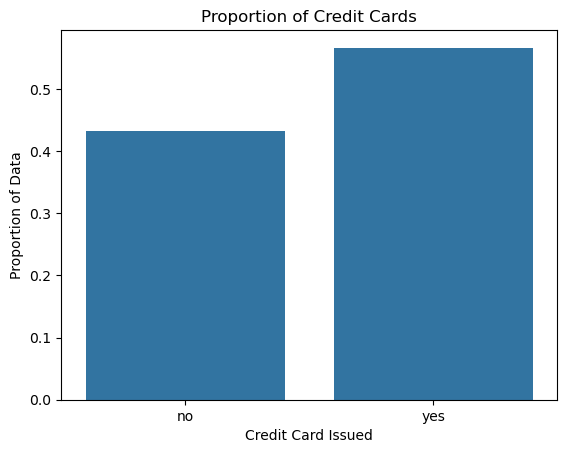

In [60]:
sns.countplot(data, x='credit_card', stat='proportion')
plt.title('Proportion of Credit Cards')
plt.xlabel('Credit Card Issued')
plt.ylabel('Proportion of Data')
plt.show()

### Non-Technical Results

The aim of this analysis was to investigate if there was a relationship between age, sex, and whether or not a credit card should be given to a User. Using a small proportion of User data and just age and sex provided a moderate significance towards this task. More User data and perhaps more characteristics such as a total price of a User's purchases or further credit and purchasing history could create a more signficant conclusion.

## Results - Products to Advertise

### Technical Results

Association Rule Mining was used to analyze potential recommendations of products to advertise to a User. A more categorical approach, versus specific brands and names of products was used on a small subset of User data. A minimum support threshold of 0.2 and a minimum confidence threshold of 0.5 was used to create rules. The top 10 rules by Lift are reported below. Lift assesses the the performance of an association rule by quantifying an improvement (or degradation) from the initial prediction. A lift greater than 1 indicates a positive correlation and valid assocation. The higher the lift values, the more signifant the rule. The top rule by lift suggests that if a User buys bags and paper, they should be advertised bodywash.

In [58]:
top_rules = advertise_rules.sort_values(by='lift', ascending=False).head(10)

In [59]:
top_rules

,rules,support,confidence,coverage,lift,count
44,"{bags,paper} => {bodywash}",0.233333,0.777778,0.300000,2.333333,7
70,"{drinks,electronics,shampoo} => {bags}",0.200000,1.000000,0.200000,2.307692,6
75,"{drinks,electronics,paper} => {bags}",0.200000,1.000000,0.200000,2.307692,6
59,"{bags,electronics} => {drinks}",0.266667,0.888889,0.300000,2.222222,8
41,"{bags,paper} => {cards}",0.200000,0.666667,0.300000,2.222222,6
54,"{bags,shampoo} => {electronics}",0.233333,1.000000,0.233333,2.142857,7
49,"{bags,shampoo} => {drinks}",0.200000,0.857143,0.233333,2.142857,6
69,"{bags,drinks,shampoo} => {electronics}",0.200000,1.000000,0.200000,2.142857,6
76,"{bags,electronics,paper} => {drinks}",0.200000,0.857143,0.233333,2.142857,6
71,"{bags,electronics,shampoo} => {drinks}",0.200000,0.857143,0.233333,2.142857,6


### Non-Technical Results

An analysis was performed to create advertisement suggestions to a User based on either what's in their cart or their past purchases. A more categorical approach versus specific brands or names of products was used. It was found that given a purchase of bags and paper, bodywash should be advertised to the User. Additionally, bags should be recommended to a User given they are have purchased drinks, electronics, and shampoo or drinks, electronics, and paper. Overall, there was a a decent split of counts for each item of interest as well.